In [1]:
import pandas as pd

In [5]:
from sklearn.datasets import fetch_california_housing

In [9]:
df=fetch_california_housing()

In [8]:
#target specify house price kiyhna hona chaiye
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset=pd.DataFrame(df.data)

In [15]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [16]:
dataset.columns=df.feature_names

In [17]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [18]:
#independent features and the dependent features
X=dataset
y=df.target

In [19]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [20]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [22]:
## standarization of data set
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


In [24]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)
## scaler.inverse_transfrom vapis jane ke liye.


In [27]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
regression= LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [32]:
np.mean(mse)

np.float64(-0.5268253746355748)

In [37]:
reg_pred=regression.predict(X_test)

In [38]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

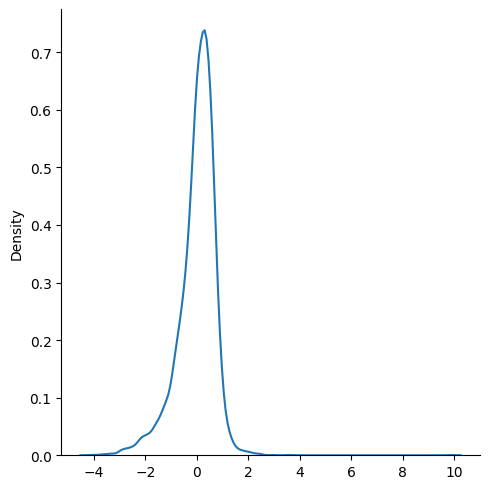

In [43]:
sns.displot(reg_pred-y_test,kind='kde')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']

In [5]:
df['total_spend']

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

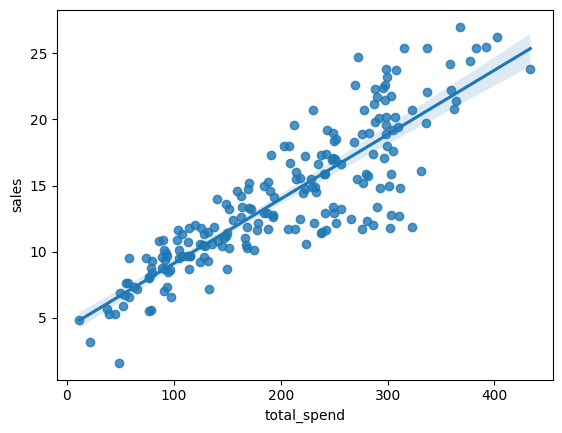

In [10]:
sns.regplot(data=df,x='total_spend',y='sales')


In [13]:
X=df['total_spend']
y=df['sales']


In [ ]:
#y=mx+b
#y=B1x+B0

In [14]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [15]:
potential_spend=np.linspace(0,500,100)

In [16]:
predicted_sales=0.04868788 * potential_spend + 4.24302822

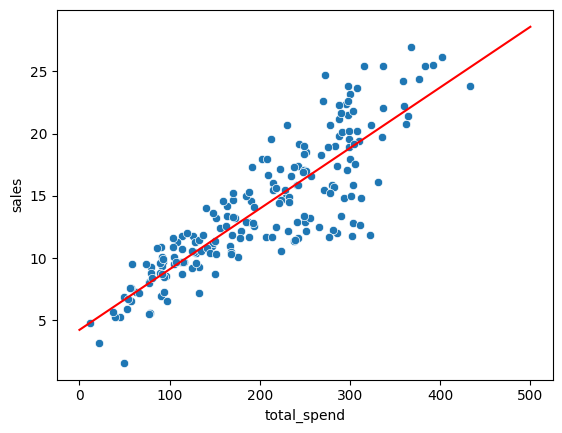

In [20]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [21]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

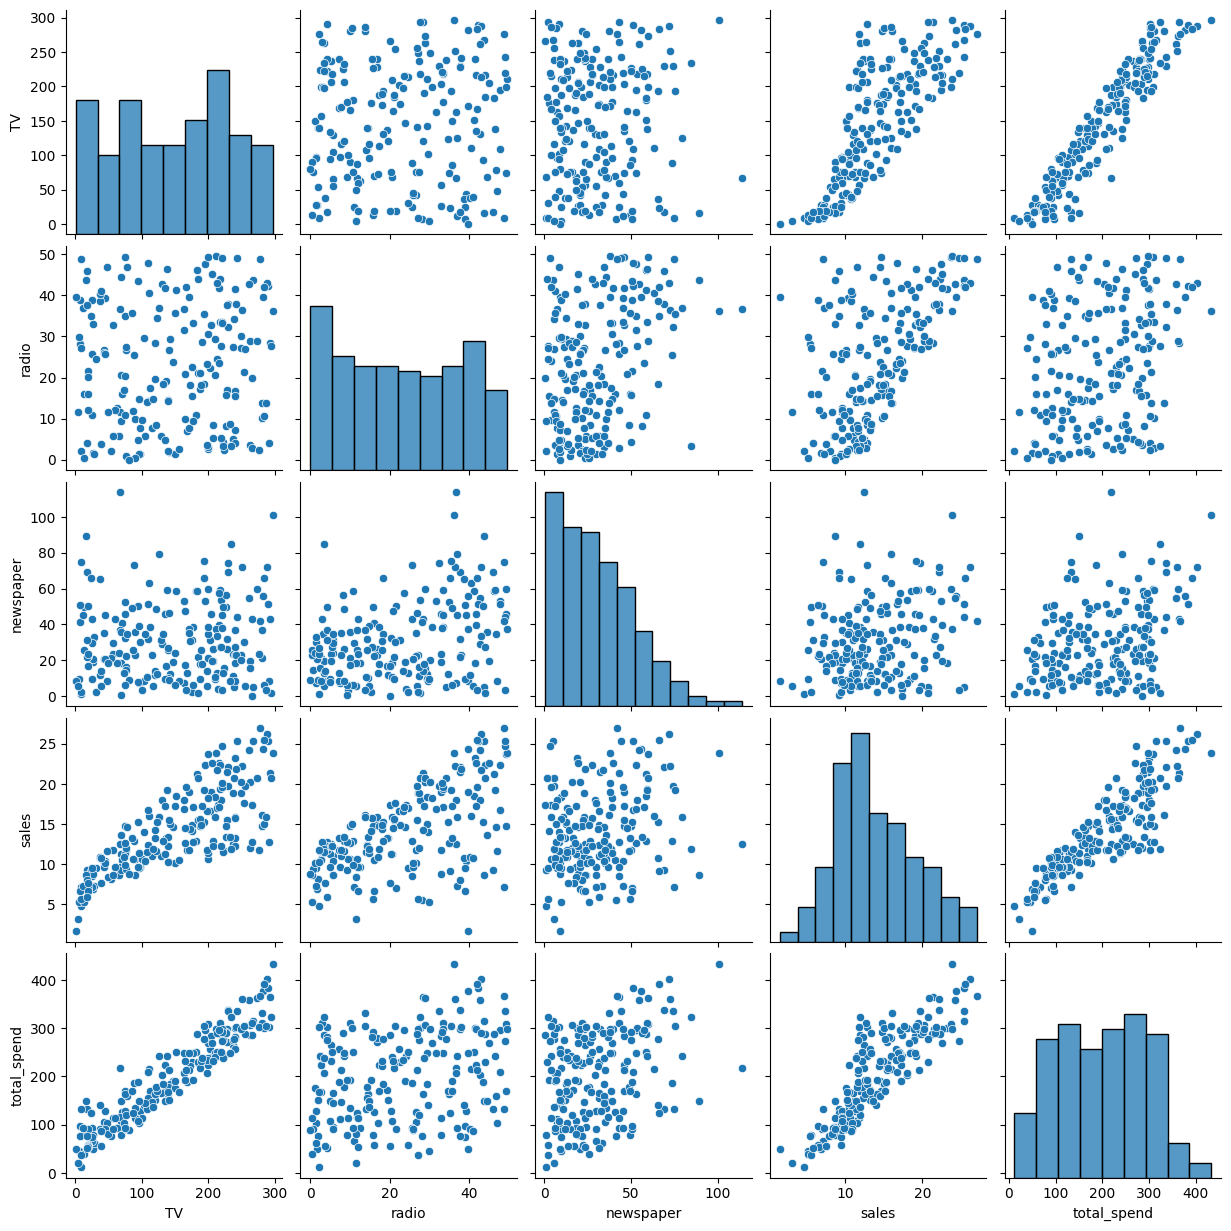

In [23]:
sns.pairplot(df)

In [24]:
X= df.drop('sales',axis=1)

In [26]:
X.drop('total_spend',axis=1)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [28]:
y=df['sales']

In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#shuffle shift so we take the random to make the data set at its original position.


In [32]:
len(df)

200

In [44]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [45]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [37]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [38]:
len(X_test)

60

In [39]:
# creating an escemator within the scikit learn
from sklearn.linear_model import LinearRegression

In [40]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(
 |      *,
 |      fit_intercept=True,
 |      copy_X=True,
 |      tol=1e-06,
 |      n_jobs=None,
 |      positive=False
 |  )
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  tol : float, default=1e-6
 |      The precision of the

In [41]:
model= LinearRegression()

In [42]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- total_spend


In [48]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [49]:
X_test.head()

,TV,radio,newspaper,total_spend
37,74.7,49.4,45.7,169.8
109,255.4,26.9,5.5,287.8
31,112.9,17.4,38.6,168.9
89,109.8,47.8,51.4,209.0
66,31.5,24.6,2.2,58.3


In [50]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [51]:
test_prediction=model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- total_spend


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df['total_spend']=df['TV']+df['sales']

In [7]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,252.2
1,44.5,39.3,45.1,10.4,54.9
2,17.2,45.9,69.3,9.3,26.5
3,151.5,41.3,58.5,18.5,170.0
4,180.8,10.8,58.4,12.9,193.7


<Axes: xlabel='total_spend', ylabel='sales'>

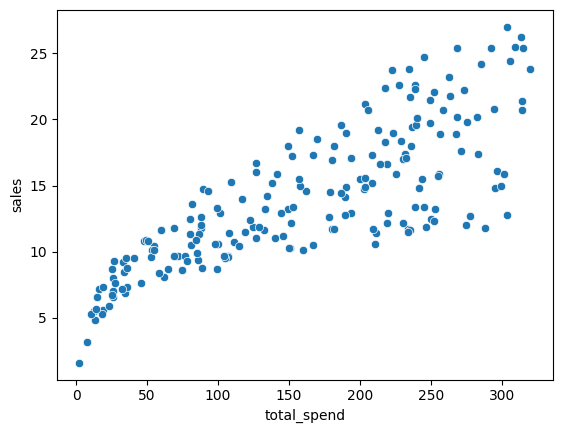

In [ ]:
sns.scatterplot(data=df,x='total_spend',y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

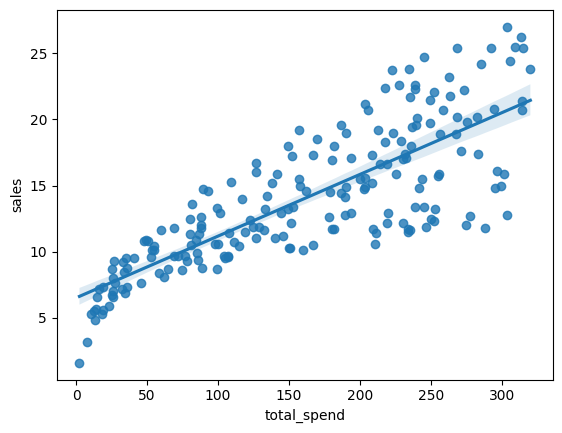

In [9]:
sns.regplot(data=df,x='total_spend',y='sales')

In [10]:
X=df['total_spend']
y=df['sales']

In [11]:
np.polyfit(X,y,deg=1)

array([0.0466248 , 6.51287611])

In [12]:
potential_spend=np.linspace(0,500,100)

In [13]:
predicted_sales=0.0466248*potential_spend+ 6.51287611

In [14]:
predicted_sales

array([ 6.51287611,  6.7483549 ,  6.98383369,  7.21931247,  7.45479126,
        7.69027005,  7.92574884,  8.16122763,  8.39670641,  8.6321852 ,
        8.86766399,  9.10314278,  9.33862156,  9.57410035,  9.80957914,
       10.04505793, 10.28053672, 10.5160155 , 10.75149429, 10.98697308,
       11.22245187, 11.45793066, 11.69340944, 11.92888823, 12.16436702,
       12.39984581, 12.63532459, 12.87080338, 13.10628217, 13.34176096,
       13.57723975, 13.81271853, 14.04819732, 14.28367611, 14.5191549 ,
       14.75463369, 14.99011247, 15.22559126, 15.46107005, 15.69654884,
       15.93202763, 16.16750641, 16.4029852 , 16.63846399, 16.87394278,
       17.10942156, 17.34490035, 17.58037914, 17.81585793, 18.05133672,
       18.2868155 , 18.52229429, 18.75777308, 18.99325187, 19.22873066,
       19.46420944, 19.69968823, 19.93516702, 20.17064581, 20.40612459,
       20.64160338, 20.87708217, 21.11256096, 21.34803975, 21.58351853,
       21.81899732, 22.05447611, 22.2899549 , 22.52543369, 22.76

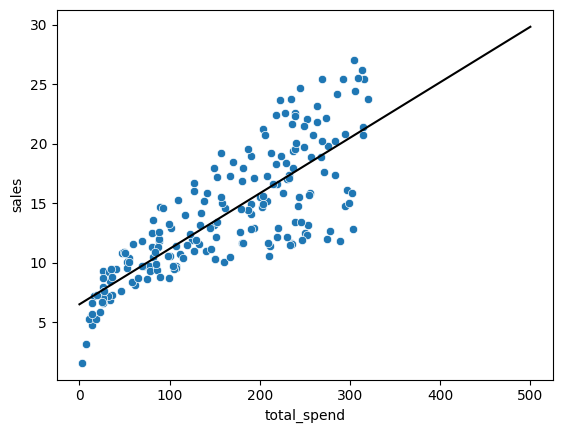

In [18]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='Black')

In [19]:
spend=200
predicted_sales= 0.0466248*spend+ 6.51287611

In [20]:
predicted_sales

15.837836110000001

In [21]:
np.polyfit(X,y,3)

array([ 7.72712701e-07, -4.07034299e-04,  1.06230931e-01,  4.55875018e+00])

In [22]:
pot_spend=np.linspace(0,500,100)

In [23]:
pred_sales=7.72712701e-07*pot_spend**3+-4.07034299e-04*pot_spend**2+ 1.06230931e-01*pot_spend**1+ 4.55875018e+00

In [24]:
pred_sales

array([ 4.55875018,  5.08498711,  5.59105638,  6.07755526,  6.54508102,
        6.99423094,  7.4256023 ,  7.83979237,  8.23739841,  8.61901772,
        8.98524755,  9.33668519,  9.6739279 ,  9.99757297, 10.30821767,
       10.60645927, 10.89289504, 11.16812226, 11.43273821, 11.68734015,
       11.93252536, 12.16889113, 12.39703471, 12.61755338, 12.83104443,
       13.03810512, 13.23933272, 13.43532452, 13.62667778, 13.81398978,
       13.99785779, 14.17887909, 14.35765096, 14.53477066, 14.71083547,
       14.88644266, 15.06218951, 15.2386733 , 15.41649129, 15.59624077,
       15.778519  , 15.96392325, 16.15305082, 16.34649896, 16.54486495,
       16.74874607, 16.95873958, 17.17544278, 17.39945292, 17.63136728,
       17.87178314, 18.12129777, 18.38050845, 18.65001245, 18.93040704,
       19.2222895 , 19.5262571 , 19.84290711, 20.17283682, 20.51664349,
       20.8749244 , 21.24827682, 21.63729803, 22.0425853 , 22.4647359 ,
       22.90434712, 23.36201622, 23.83834047, 24.33391716, 24.84

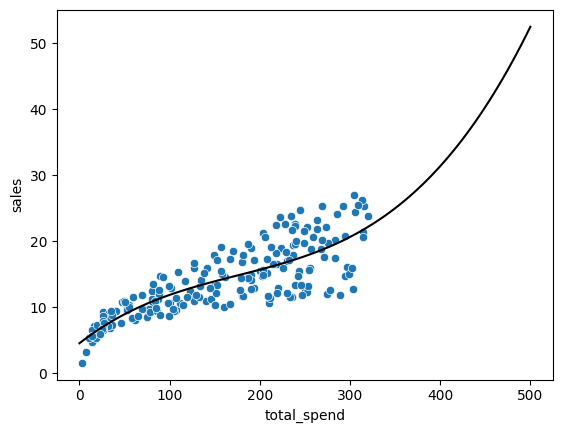

In [25]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(pot_spend,pred_sales,color='Black')

In [27]:
#fit it on the train data and test it on the test data done in the linear regression
df=pd.read_csv('Advertising.csv')

In [29]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


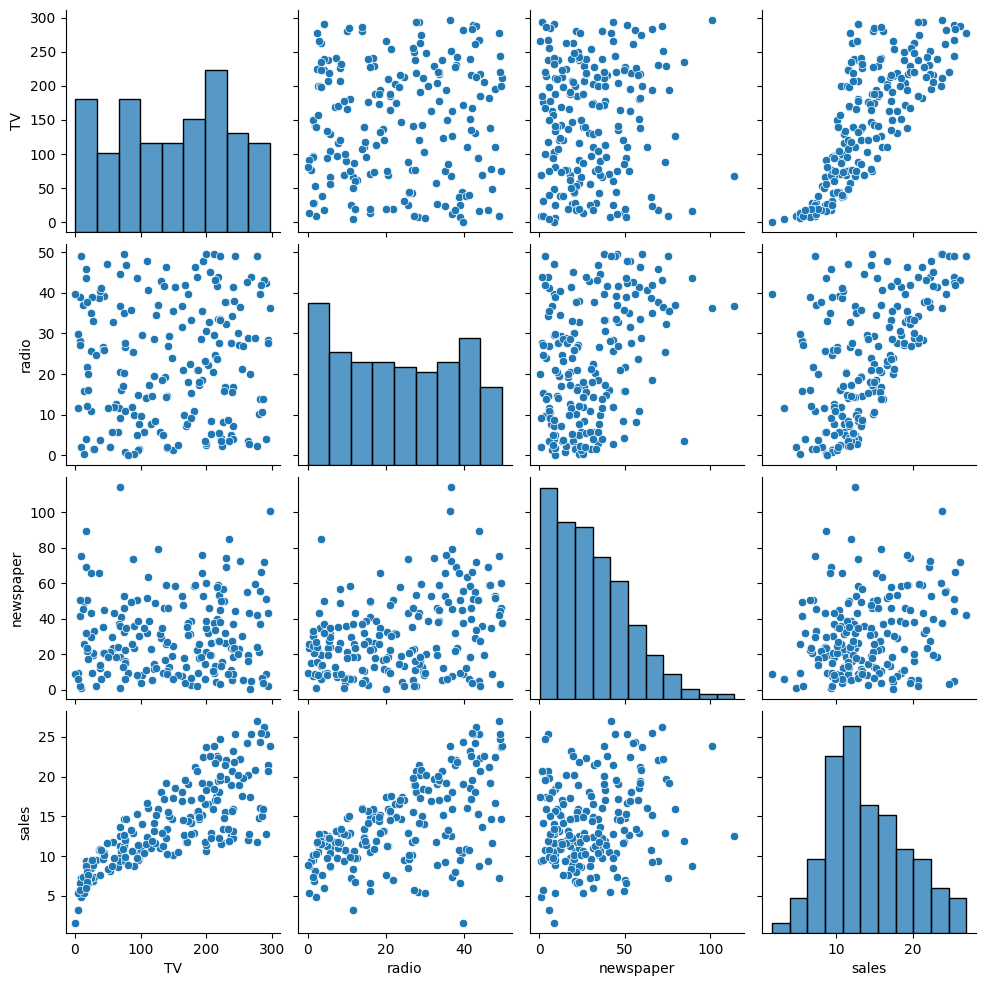

In [32]:
# relationship between the each features 
sns.pairplot(df)

In [33]:
#seperate into the features and labels
X=df.drop('sales',axis=1)

In [34]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [36]:
y=df['sales']

In [37]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [40]:
len(df)

200

In [ ]:
X_train
# 70 % of data in trian 

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [42]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [ ]:
len(X_test)
# 30 % of data

60

In [44]:
# creating an estimator
from sklearn.linear_model import LinearRegression

In [45]:
# hyperparameters added to increase the performnace.
model= LinearRegression()

In [46]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [48]:
# PERFORMING THE EVALUATION

In [ ]:
# MAE won't punish for the large possible error.
# RMSE punish the large values that causes the error
model.predict(X_test) # y_test

In [49]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [50]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

In [ ]:
model.predict(X_test)